<h1> YouTube USA Data Visualization</h1>


I watch YouTube a lot, as much as I really don't want to. It's been embeded in my life and has been a regular routine to watch YouTube videos and follow the channels or creators. Everytime I go on YouTube, I check the Trending Page to see what's new. Usually, the trending page changes every day; either the videos that are trending are news report or some artist's new music video. But, I want to know exactly what gets on the Trending page. Is the YouTube Algorithm in any way biased? What type of videos are usually featured? Which type of videos are under or overrepresented by YouTube? If I post a video on YouTube, what are some title names, description or tags that I should use if I want to become a popular YouTuber and land on the Trending page?  

Here are some of the questions that I asked: 

- Whats the most frequent type of video?
- What is the distribuition of views, likes, comments and engagement? Is it equal for all categories?
- Do we have a normal distribuition to the values?
- Whats the most frequent names in title, description, tags?

Credits to Leonardo Ferreira for inspiration!

<h2>Importing libraries</h2>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [10]:
df = pd.read_csv("youtube-new/USvideos.csv")

In [7]:
#Looking some info of the data
print(df.shape)
print(df.nunique())

(40949, 16)
video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [8]:
#Looking for nulls and type of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [12]:
df.head(n=5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


<h2> Do views, likes, dislikes and comment counts have a normal distribuition?</h2>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


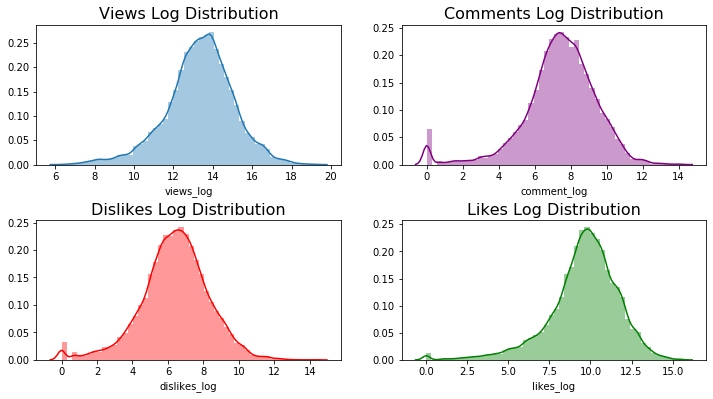

In [16]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df['views_log'])
g1.set_title("Views Log Distribution", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['likes_log'],color='green')
g2.set_title('Likes Log Distribution', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color='red')
g3.set_title("Dislikes Log Distribution", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['comment_log'], color='purple')
g4.set_title("Comments Log Distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [11]:
print("Views quantiles")
print(df['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64

Likes quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64


In [12]:
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

<h2>Looking at views, likes, dislikes distribuition by category names</h2>

Category name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


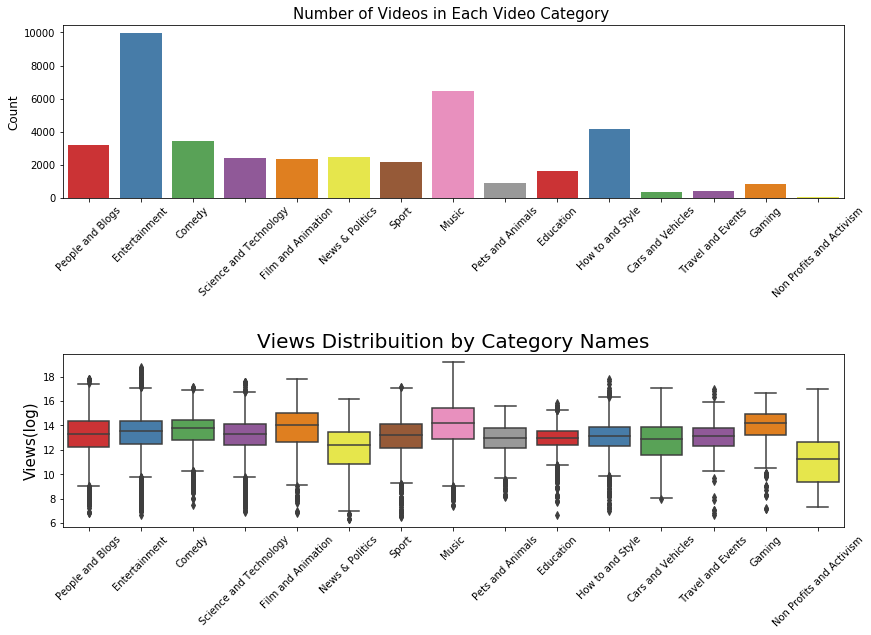

In [28]:
print("Category name count")
print(df.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Number of Videos in Each Video Category ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

Even though videos that are categorized Entertainment is significantly higher than music, the videos in the music category seems to be more popular (has a higher median of views). Gaming videos and Education videos have a relatively high minimum, but the view distribution doesn't vary as big as the Non Profits and Activism videos.
The Non Profits and Activism videos is uniquely different, with the lowest number of videos by category and median views. 

<h2>Looking at the views, likes, dislikes distribuition by category name</h2>

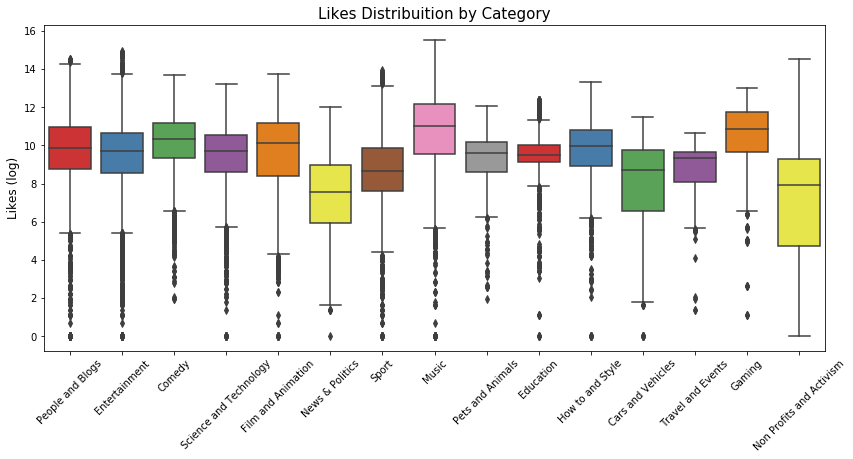

In [29]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes (log)", fontsize=12)
plt.show()

American really loves music videos and anything Entertainment-related. Non Profits and Activism videos vary drastically, maybe depending on the trend during that year (possible cause: Metoo movement, BlackLivesMatter, etc.).  

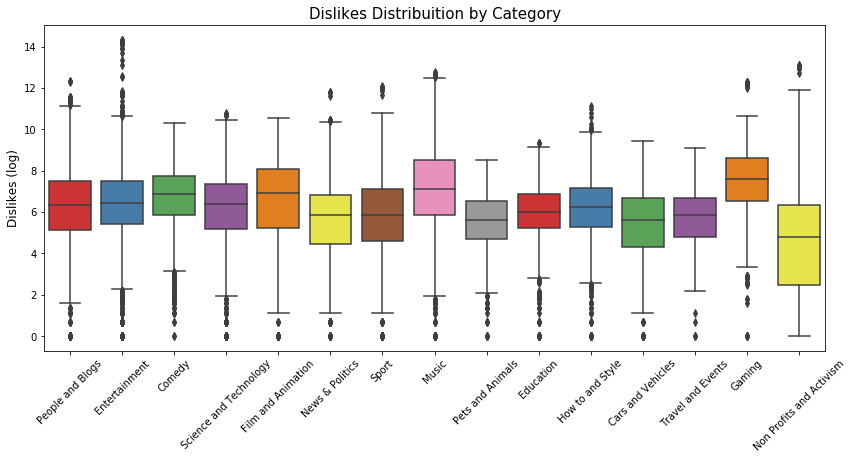

In [30]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes Distribuition by Category", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes (log)", fontsize=12)
plt.show()

Not surprised that entertainment-related videos and music videos has a high 75th quartile for dislikes (e.g. Justin Bieber's "Baby" or yOuTuBe ReWiNd). Surprised that they are many dislikes in Non Profits and Activism category as well as How to and Style. 

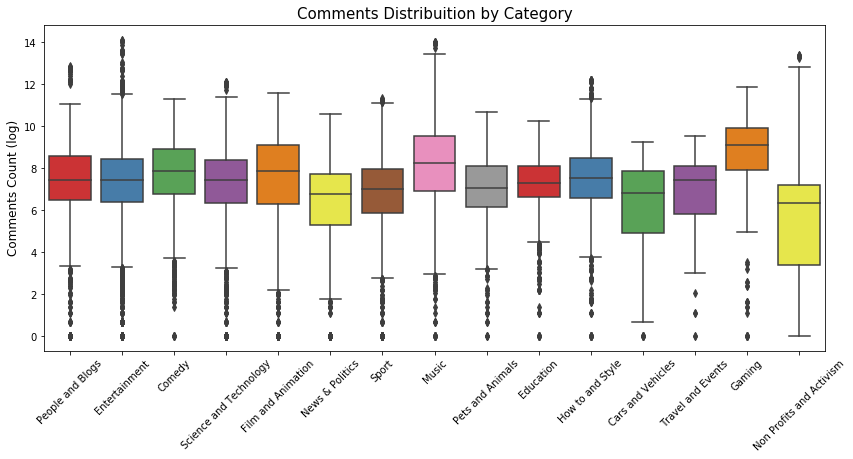

In [31]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count (log)", fontsize=12)

plt.show()

<h1>Calculating Engagement</h1>

I created some new variables to analyze the percent of likes, dislikes, comment by each category to discover which category have the highest engagement.

In [33]:
df['like_rate'] =  df ['likes'] / df['views'] * 100
df['dislike_rate'] =  df ['dislikes'] / df['views'] * 100
df['comment_rate'] =  df ['comment_count'] / df['views'] * 100

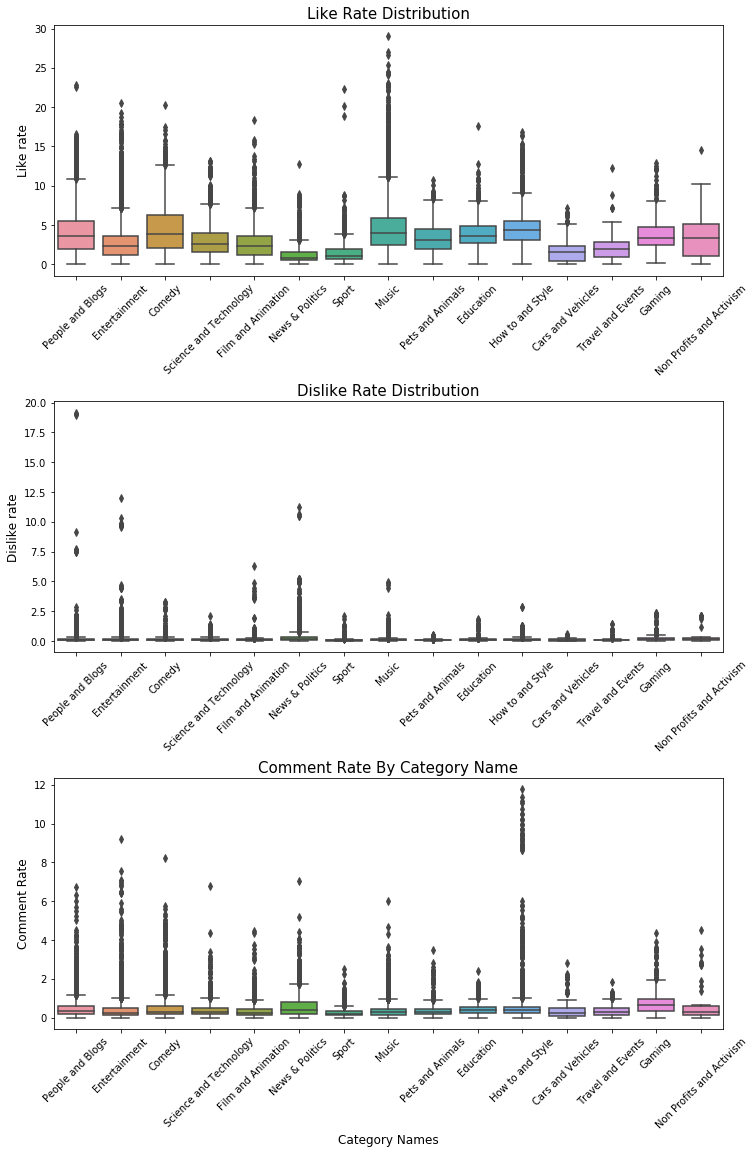

In [35]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Like Rate Distribution", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Dislike Rate Distribution", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=df)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("Comment Rate By Category Name", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

The dislike rate is very low in almost all categories but some outliers in 'People and Blogs' and News & Politics that we can might can consider "Normal". The music category have the highest engagement rate.

And at the comment rate we can see the how-to category with the highest rates of commments, where I would expect more comments in the politics section and gaming section (like memes).

<h2>Looking through other categorical variables </h2>
We have the variables:
- Comments Disable
- Rating disable
- Video error/Removed


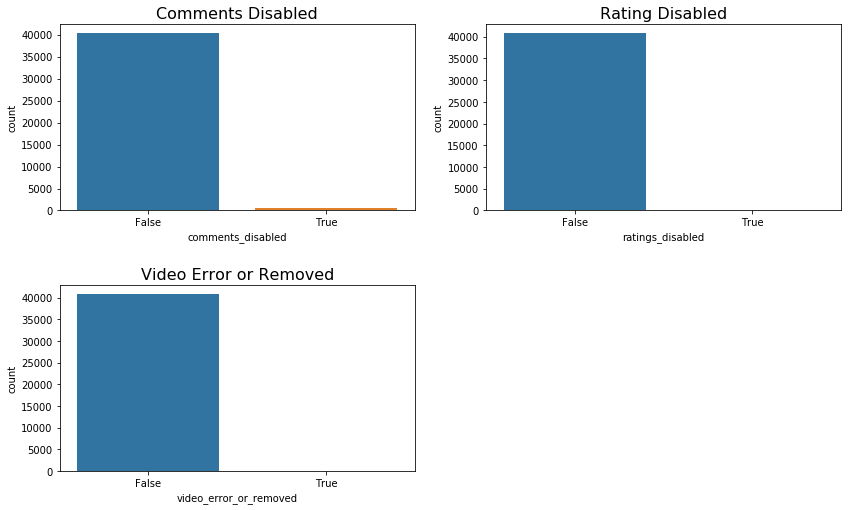

In [36]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

Make sure your videos allow comments and ratings enabled!

<h2>Creating a Correlation Matrix</h2>

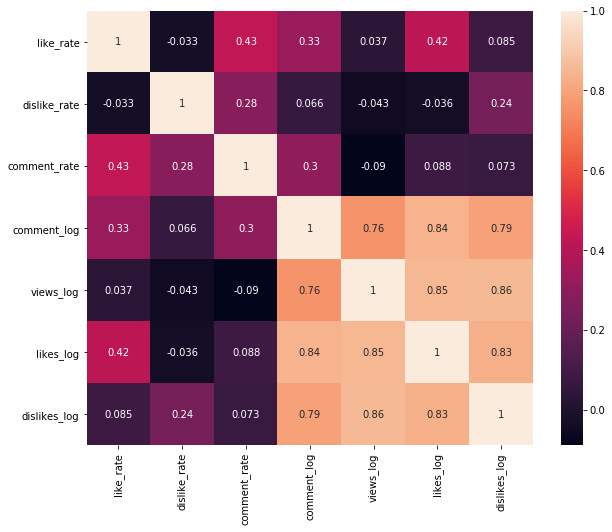

In [39]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(df[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show()

<h2>Whats the most frequent names in title, description, tags?</h2>

In [11]:
#nlp
import string
import re    #for regex
import nltk
nltk.download("stopwords")
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mitsukakiyohara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Setting the stopwords
eng_stopwords = set(stopwords.words("english"))

In [13]:
#Word count in each comment:
df['count_word']=df["title"].apply(lambda x: len(str(x).split()))
df['count_word_tags']=df["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["title"].apply(lambda x: len(set(str(x).split())))
df['count_unique_word_tags']=df["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["title"].apply(lambda x: len(str(x)))
df['count_letters_tags']=df["tags"].apply(lambda x: len(str(x)))

#punctuation count
df["count_punctuations"] =df["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df["count_punctuations_tags"] =df["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df["count_words_upper_tags"] = df["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df["count_words_title"] = df["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df["count_words_title_tags"] = df["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df["count_stopwords_tags"] = df["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df["mean_word_len_tags"] = df["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [14]:
#derived features
#Word count percent in each comment:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
df['word_unique_percent_tags']=df['count_unique_word_tags']*100/df['count_word_tags']

#Punct percent in each comment:
df['punct_percent']=df['count_punctuations']*100/df['count_word']
df['punct_percent_tags']=df['count_punctuations_tags']*100/df['count_word_tags']

<h2>Have the punctuations in titles have any relation with views, likes, dislikes and comments? </h2>

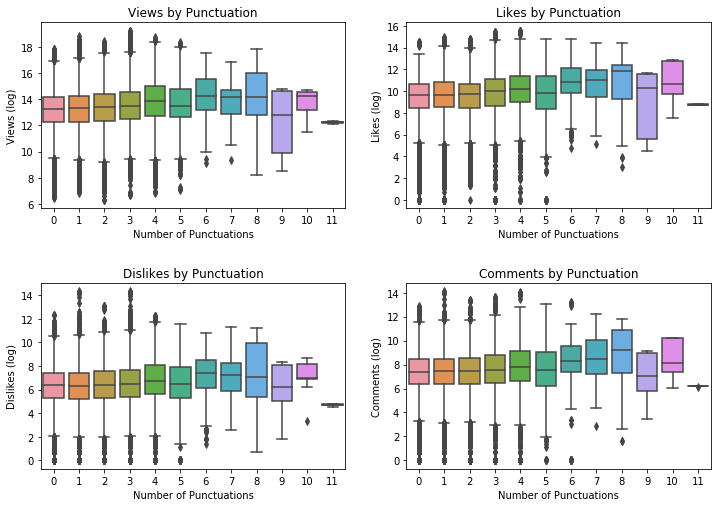

In [49]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations', y='views_log',data=df)
g.set_title("Views by Punctuation")
g.set_xlabel("Number of Punctuations")
g.set_ylabel("Views (log)")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations', y='likes_log',data=df)
g1.set_title("Likes by Punctuation")
g1.set_xlabel("Number of Punctuations")
g1.set_ylabel("Likes (log)")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations', y='dislikes_log',data=df)
g2.set_title("Dislikes by Punctuation")
g2.set_xlabel("Number of Punctuations")
g2.set_ylabel("Dislikes (log)")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations', y='comment_log',data=df)
g3.set_title("Comments by Punctuation")
g3.set_xlabel("Number of Punctuations")
g3.set_ylabel("Comments (log)")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

<h2>Creating a Correlation Matrix Between Titles and Tags with views</h2>

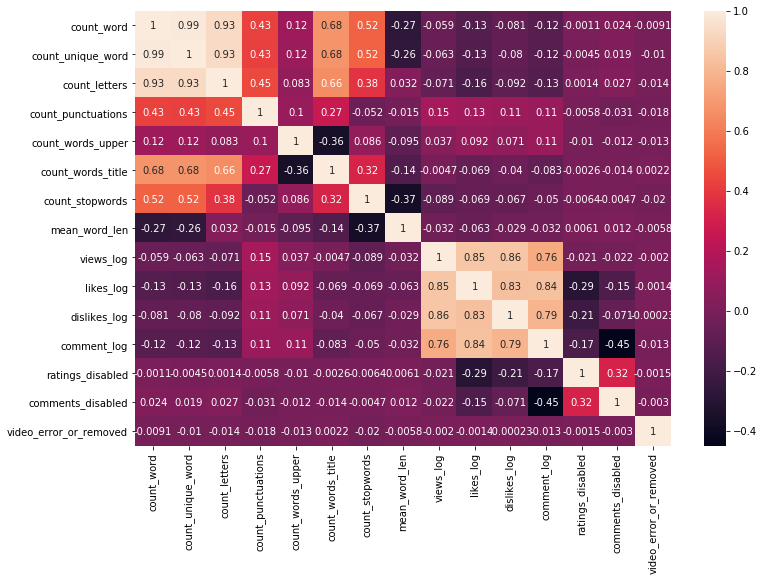

In [17]:
plt.figure(figsize = (12,8))

sns.heatmap(df[['count_word', 'count_unique_word','count_letters',
                     "count_punctuations","count_words_upper", "count_words_title", 
                     "count_stopwords","mean_word_len", 
                     'views_log', 'likes_log','dislikes_log','comment_log',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed']].corr(), annot=True)
plt.show()

<h1>Visualizing  the Word Cloud of Tagged videos </h1>
- Ratings Disable 
- Comments Disable
- Video Error or Removed

In [18]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1 

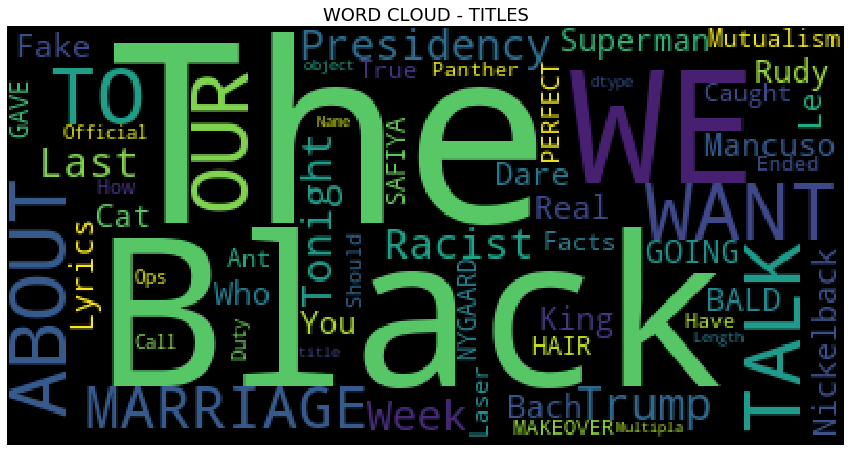

In [25]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

<h1>WordCloud of Description</h1>

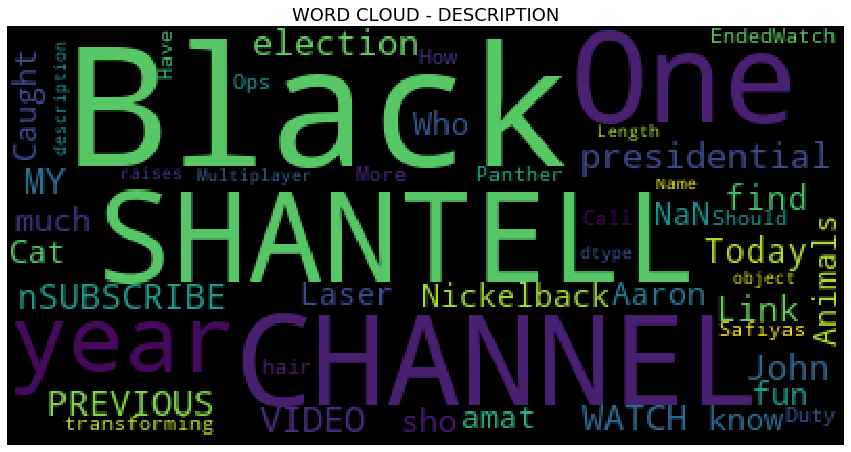

In [27]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']

stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()


<h1>Wordcloud of Tags</h1>

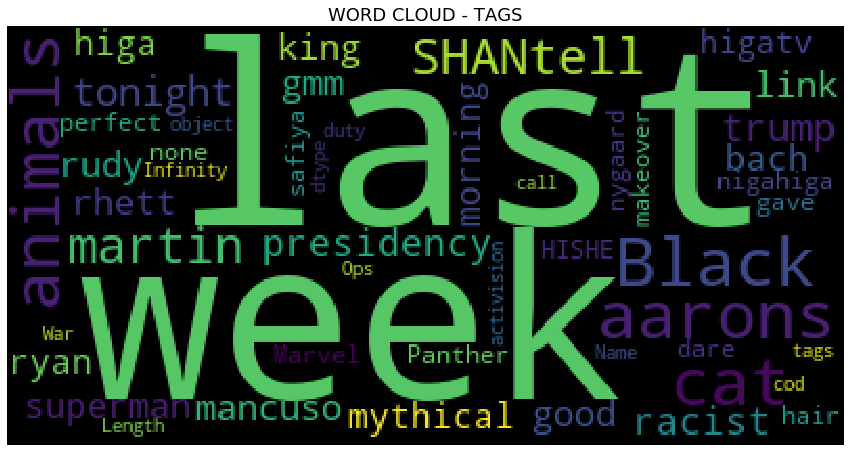

In [29]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

In [30]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Category Name count
5     6681
2     6207
12    6182
3     6175
1     5502
Name: month, dtype: int64


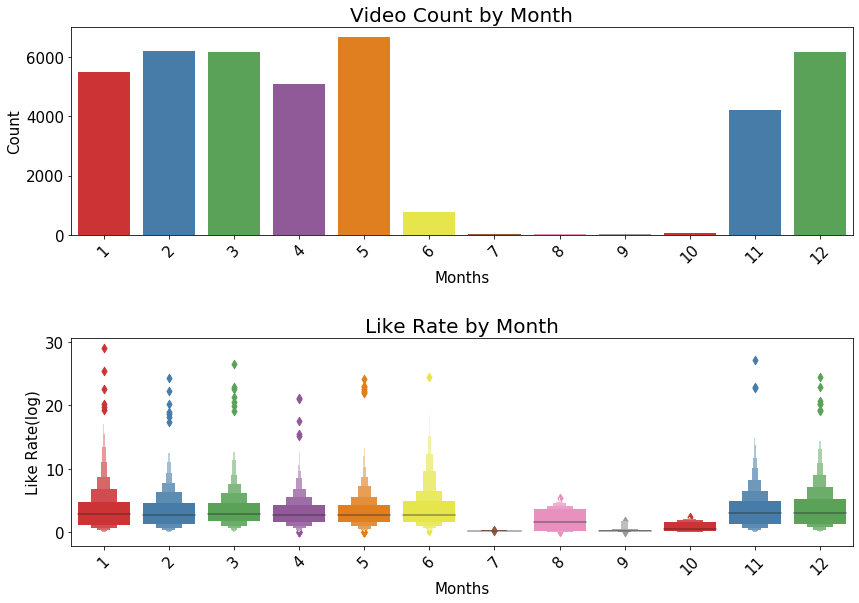

In [35]:
df['month'] = df['publish_time'].dt.month

print("Category Name count")
print(df['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Video Count by Month", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='month', y='like_rate', data=df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Month", fontsize=20)
g1.set_xlabel("Months", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

## Extracting the hour value of datetime

In [36]:
# separates date and time into two columns from 'publish_time' column
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['hour','min','sec']] = df['publish_time'].astype(str).str.split(':', expand=True).astype(int)

## Knowning the Hour feature

TOP 5 Hour values
16    3669
15    3483
17    3447
18    2889
14    2807
Name: hour, dtype: int64


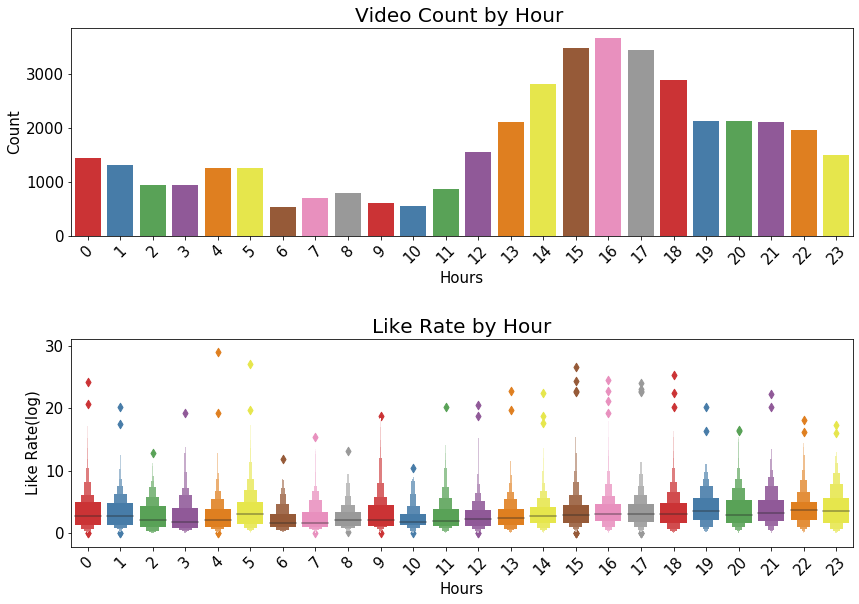

In [38]:
print("TOP 5 Hour values")
print(df['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('hour', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Video Count by Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='hour', y='like_rate', data=df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()